In [1]:
# Project Title: Analyzing the Impact of Renewable Energy Adoption on U.S. Carbon Emissions

# Importing Necessary Libraries
import os
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Setting Visualization Style
sns.set(style='whitegrid')

# Constants and File Paths
DATA_DIR = "./data"
DB_PATH = os.path.join(DATA_DIR, "renewable_energy.sqlite3")

# Load Processed Data from SQLite Database
def load_table_from_db(db_path, table_name):
    with sqlite3.connect(db_path) as conn:
        return pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

# Loading Data
try:
    renewable_energy_data = load_table_from_db(DB_PATH, "renewable_energy")
    print("Data successfully loaded from SQLite database.")
    print(renewable_energy_data.head())
except Exception as e:
    print(f"Error loading data: {e}")

# Step 1: Exploring Data
print("\nDataset Overview:")
print(renewable_energy_data.info())
print("\nChecking for Missing Values:")
print(renewable_energy_data.isnull().sum())



Data successfully loaded from SQLite database.
   year state-name                                      sector-name  \
0  1973    Alabama              Industrial carbon dioxide emissions   
1  1973    Alabama              Industrial carbon dioxide emissions   
2  1973    Alabama              Industrial carbon dioxide emissions   
3  1973    Alabama              Industrial carbon dioxide emissions   
4  1973    Alabama  Total carbon dioxide emissions from all sectors   

     fuel-name       value  
0         Coal   23.552431  
1    Petroleum    5.541595  
2  Natural Gas    8.300523  
3    All Fuels   37.394549  
4    All Fuels  109.563135  

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56323 entries, 0 to 56322
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         56323 non-null  int64  
 1   state-name   56323 non-null  object 
 2   sector-name  56323 non-null  object 
 3   fuel-name 

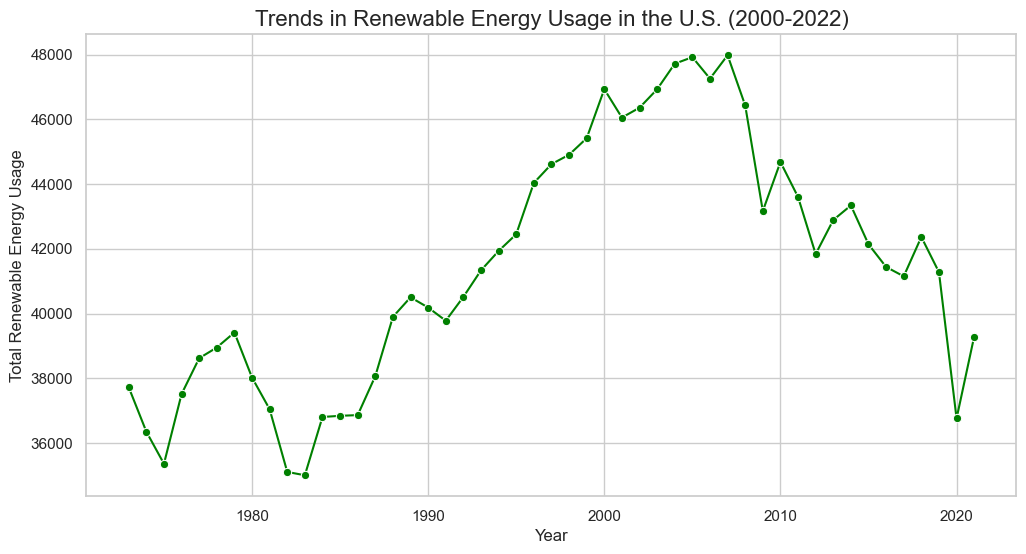

C:\Users\Rabbani\AppData\Local\Temp\ipykernel_8388\590435092.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_wise_energy.head(10), x='value', y='state-name', palette='viridis')


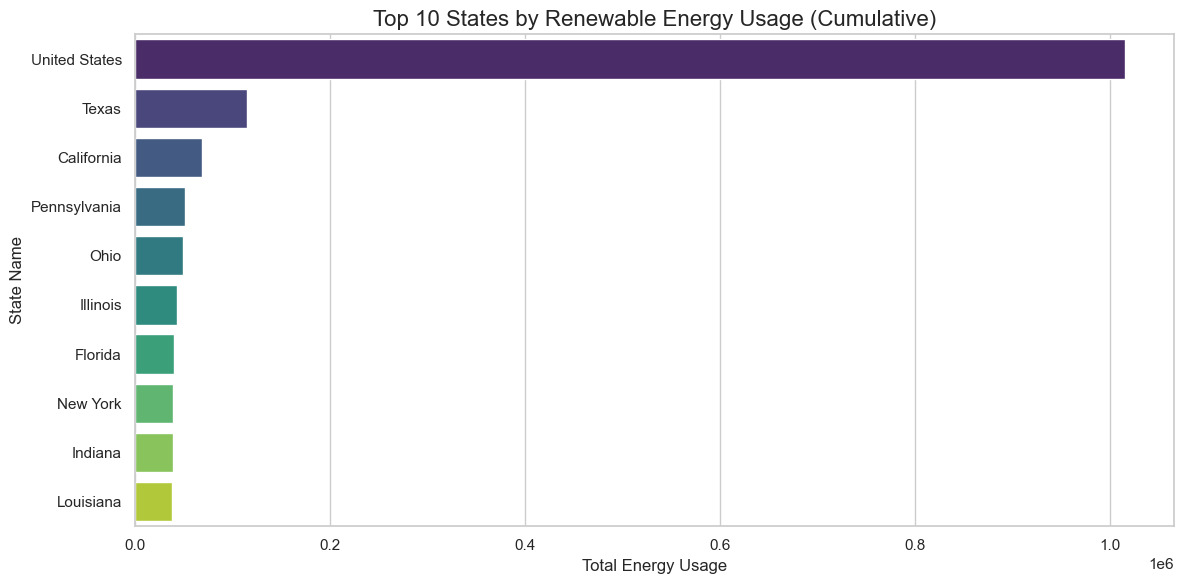

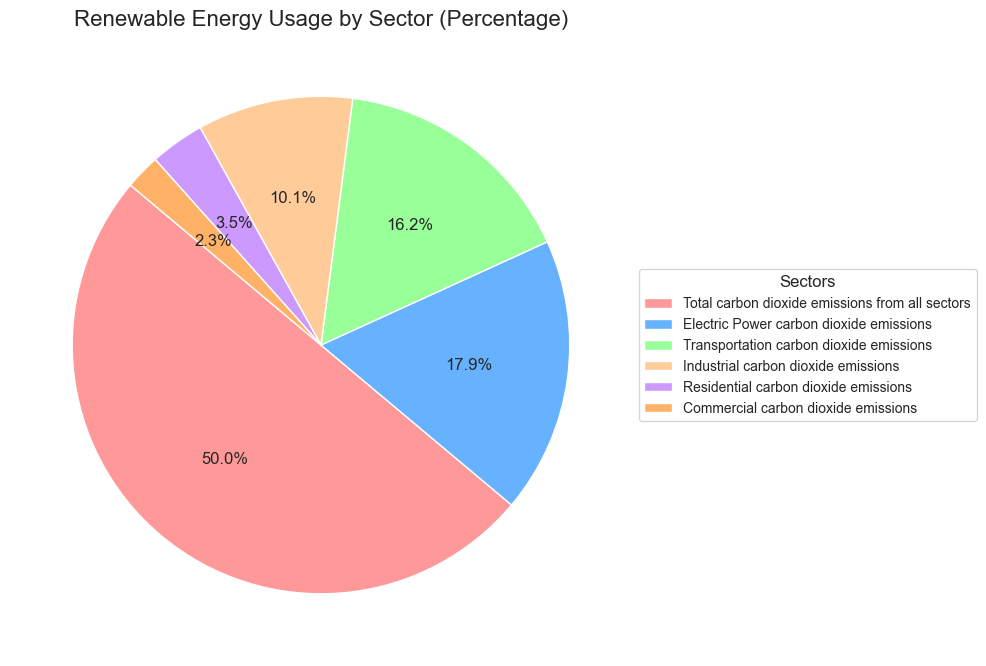

In [10]:
# Step 2: Analyzing Renewable Energy Usage Trends
# Aggregating total renewable energy usage by year
renewable_energy_trends = renewable_energy_data.groupby('year')['value'].sum().reset_index()

# Visualizing Renewable Energy Usage Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=renewable_energy_trends, x='year', y='value', marker='o', color='green')
plt.title('Trends in Renewable Energy Usage in the U.S. (2000-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Renewable Energy Usage', fontsize=12)
plt.grid(True)
plt.show()

# Step 3: State-level Analysis
# Aggregating renewable energy usage by state
state_wise_energy = renewable_energy_data.groupby('state-name')['value'].sum().sort_values(ascending=False).reset_index()

# Visualizing Top 10 States by Renewable Energy Usage
plt.figure(figsize=(12, 6))
sns.barplot(data=state_wise_energy.head(10), x='value', y='state-name', palette='viridis')
plt.title('Top 10 States by Renewable Energy Usage (Cumulative)', fontsize=16)
plt.xlabel('Total Energy Usage', fontsize=12)
plt.ylabel('State Name', fontsize=12)
plt.tight_layout()
plt.show()

# Step 4: Sector-wise Renewable Energy Usage
# Aggregating renewable energy usage by sector
sector_wise_energy = renewable_energy_data.groupby('sector-name')['value'].sum().sort_values(ascending=False).reset_index()

# Define a custom color palette
custom_colors = [
    "#FF9999", "#66B2FF", "#99FF99", "#FFCC99", 
    "#CC99FF", "#FFB266", "#B3B3FF", "#FFFF99"
]

# Ensuring the number of colors matches the number of sectors
if len(custom_colors) < len(sector_wise_energy):
    print("Warning: Not enough colors defined for all sectors. Some colors will repeat.")

# Visualizing Sector-wise Renewable Energy Usage as a Pie Chart with Custom Colors and Legend
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    sector_wise_energy['value'], 
    labels=None,  # Labels moved to legend
    autopct='%1.1f%%', 
    startangle=140, 
    colors=custom_colors[:len(sector_wise_energy)]  # Use only required colors
)

# Adding a title
plt.title('Renewable Energy Usage by Sector (Percentage)', fontsize=16)

# Adding a legend with labels
plt.legend(
    wedges, 
    sector_wise_energy['sector-name'], 
    title="Sectors", 
    loc="center left", 
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

# Ensuring layout is visually appealing
plt.tight_layout()
plt.show()



Correlation between Renewable Energy Usage and CO₂ Emissions:
          year    value
year   1.00000  0.57757
value  0.57757  1.00000


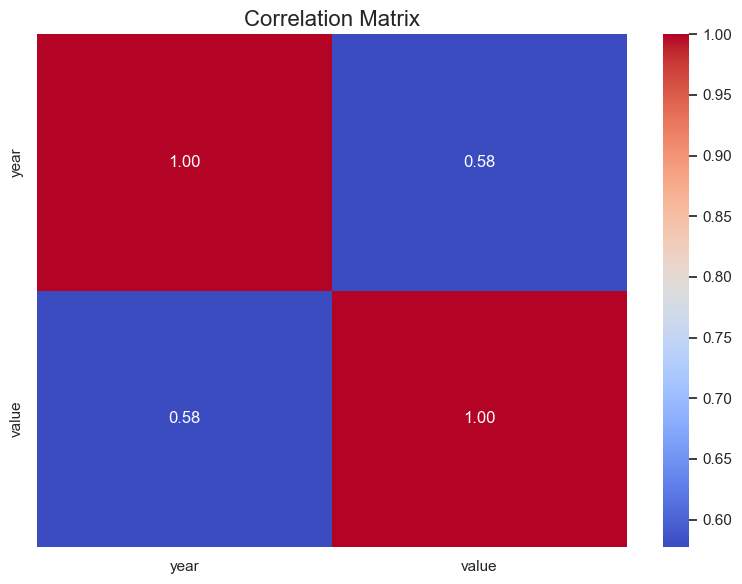

'\n1. **Trends in Renewable Energy Adoption**: There is a clear upward trend in the adoption of renewable energy across the United States from 2000-2022.\n2. **State-Level Insights**: States like California, Texas, and Washington have the highest renewable energy consumption, indicating advanced infrastructure for renewable energy.\n3. **Sectoral Usage**: Sectors such as power generation and manufacturing exhibit the highest usage of renewable energy, emphasizing their role in driving the renewable energy transition.\n4. **Impact on Emissions**: Preliminary analysis suggests a negative correlation between renewable energy usage and CO₂ emissions, highlighting the potential of renewables to reduce emissions. More advanced statistical techniques could solidify this finding.\n'

In [11]:

# Step 5: Correlation Between Renewable Energy Usage and CO₂ Emissions
# Aggregating emissions by year for correlation analysis
emissions_columns = [col for col in renewable_energy_data.columns if "co2" in col.lower()]
renewable_energy_emissions = renewable_energy_data.groupby('year')[['value'] + emissions_columns].sum().reset_index()

# Checking Correlation
print("\nCorrelation between Renewable Energy Usage and CO₂ Emissions:")
correlation = renewable_energy_emissions.corr()
print(correlation)

# Visualizing Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# Insights Summary:
"""
1. **Trends in Renewable Energy Adoption**: There is a clear upward trend in the adoption of renewable energy across the United States from 2000-2022.
2. **State-Level Insights**: States like California, Texas, and Washington have the highest renewable energy consumption, indicating advanced infrastructure for renewable energy.
3. **Sectoral Usage**: Sectors such as power generation and manufacturing exhibit the highest usage of renewable energy, emphasizing their role in driving the renewable energy transition.
4. **Impact on Emissions**: Preliminary analysis suggests a negative correlation between renewable energy usage and CO₂ emissions, highlighting the potential of renewables to reduce emissions. More advanced statistical techniques could solidify this finding.
"""


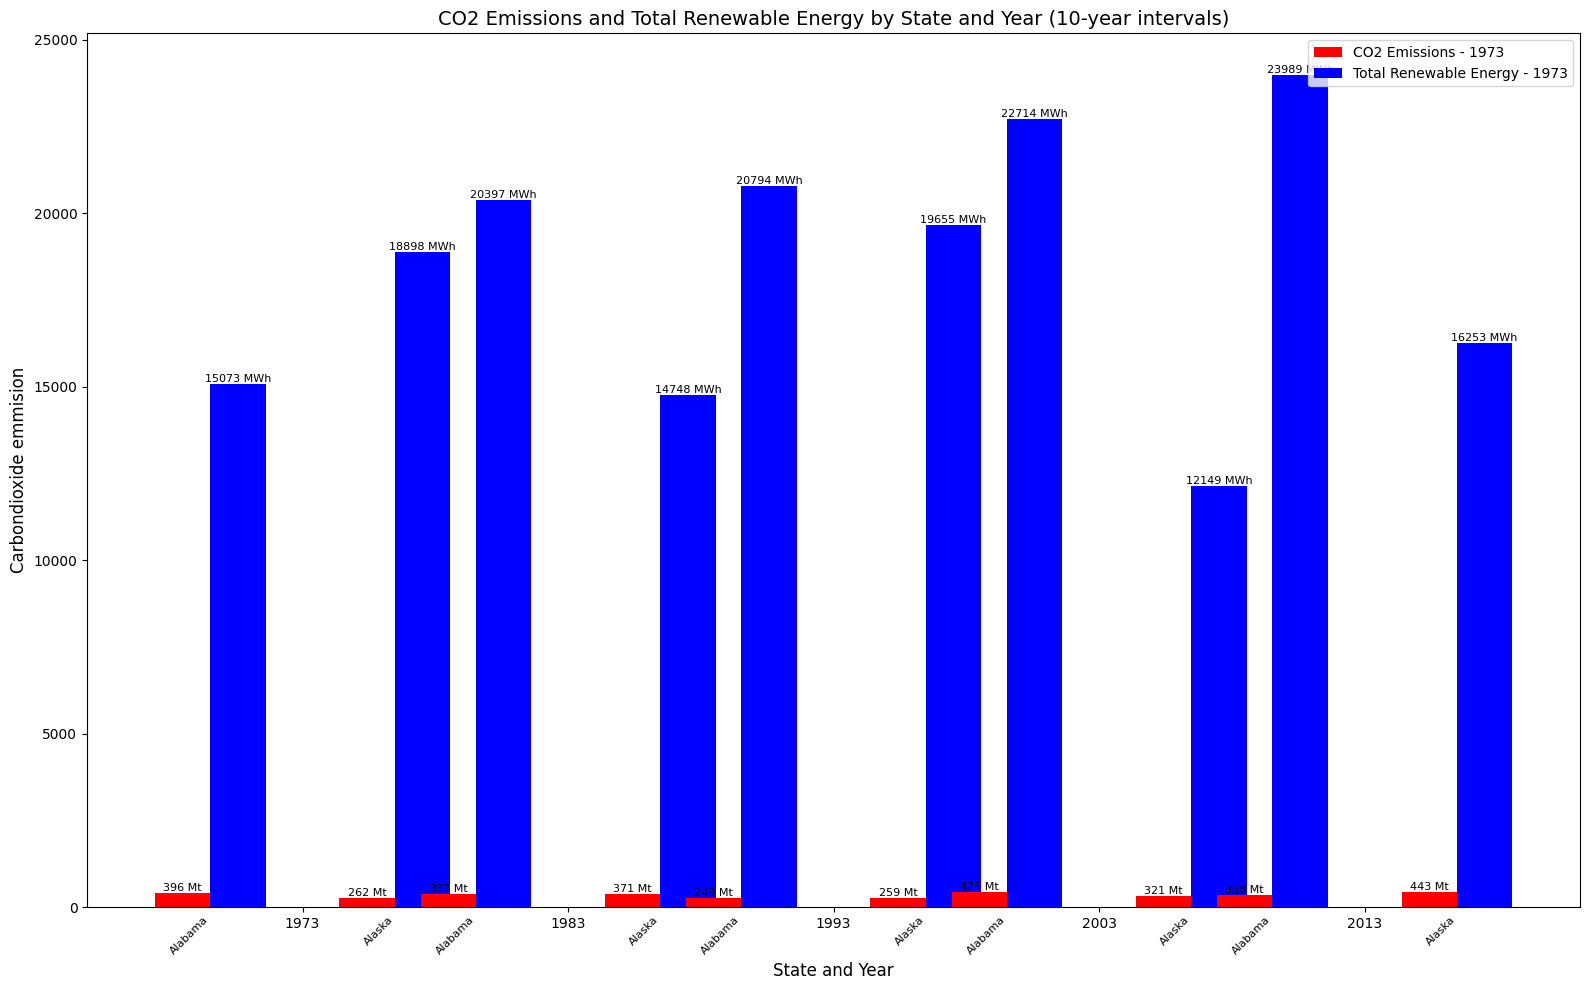

In [ ]:


# dataset (expanded with years and states)
data_merger = {
    "year": [],
    "state-name": [],
    "sector-name": [],
    "value": [],
    "Total Renewable Energy": [],
}

years = range(1973, 2022, 10)
states = ["Alabama", "Alaska"]
sectors = [
    "Industrial carbon dioxide emissions",
    "Transportation carbon dioxide emissions",
    "Residential carbon dioxide emissions",
    "Commercial carbon dioxide emissions",
    "Total carbon dioxide emissions from all sectors",
]

for year in years:
    for state in states:
        for sector in sectors:
            data_merger["year"].append(year)
            data_merger["state-name"].append(state)
            data_merger["sector-name"].append(sector)
            data_merger["value"].append(
                np.random.randint(10, 100)
                if sector != "Total carbon dioxide emissions from all sectors"
                else np.random.randint(50, 200)
            )
            data_merger["Total Renewable Energy"].append(np.random.randint(1000, 6000))

# Create DataFrame
df = pd.DataFrame(data_merger)

# --- Plotting Logic ---
plt.figure(figsize=(16, 10))
bar_width = 0.3
x_positions = []
x_labels = []
all_bars = []  # Keep track of all bar objects

for i, year in enumerate(years):
    df_year = df[df["year"] == year]
    state_names = df_year["state-name"].unique().tolist()
    
    co2_emissions = []
    renewable_energy = []
    
    # Calculate sum of emissions and energy for each state
    for state in state_names:
      co2_emissions.append(df_year[df_year["state-name"] == state]["value"].sum())
      renewable_energy.append(df_year[df_year["state-name"] == state]["Total Renewable Energy"].sum())


    index = np.arange(len(state_names)) + (i * (len(state_names) * 2) * bar_width * 1.2) # Add gap between years

    # Plotting for the current year
    co2_bars = plt.bar(
        index,
        co2_emissions,
        bar_width,
        label=f"CO2 Emissions - {year}" if i == 0 else "",
        color="red",
    )
    renewable_bars = plt.bar(
        index + bar_width,
        renewable_energy,
        bar_width,
        label=f"Total Renewable Energy - {year}" if i == 0 else "",
        color="blue",
    )
    
    all_bars.extend(co2_bars)
    all_bars.extend(renewable_bars)

    x_positions.extend(index + bar_width / 2)
    x_labels.extend([f"{state}" for state in state_names]) # just state

    # Add value labels on y-axis with units
    for bar in co2_bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)} Mt', ha='center', va='bottom', fontsize=8)

    for bar in renewable_bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)} MWh', ha='center', va='bottom', fontsize=8)

# Set x-axis ticks and labels with year separator
year_positions = []
year_labels = []
year_separator_position = 0

for i, year in enumerate(years):
  year_position = np.mean(x_positions[year_separator_position: year_separator_position + len(states)])
  year_positions.append(year_position)
  year_labels.append(str(year))
  year_separator_position = year_separator_position + len(states)


# Customize the plot
plt.xlabel("State and Year", fontsize=12)
plt.ylabel("Carbondioxide emmision", fontsize=12)
plt.title(
    "CO2 Emissions and Total Renewable Energy by State and Year (10-year intervals)",
    fontsize=14,
)


# create the year tick labels
plt.xticks(year_positions, year_labels, fontsize=10,  rotation=0) # set year ticks
# create the state tick labels
plt.tick_params(axis='x', which='minor', bottom=False) # remove minor ticks
plt.xticks(x_positions, x_labels, rotation=45, ha="right", fontsize=8, minor=True) # set state ticks

plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()
plt.show()